In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../outputs/indicateurs_simplifies.csv")
df



,Code département,Département,Densité de médecins généralistes 100 000 habitants,Moyenne bénéficiaires CSS (2023),Espérance de vie à la naissance (Hommes)(2023),Espérance de vie à la naissance (Femmes)(2023),Taux de mortalité prématurée (2023),Taux de pauvreté(2023),Écart au salaire moyen national (%) (2023)
0,59,NORD,157,104150.294598,78.2,84.4,2.0,19.5,-7.35
1,60,OISE,102,22038.756444,79.5,84.7,1.7,13.4,-9.65
2,62,PAS-DE-CALAIS,129,52136.014831,77.3,83.8,2.4,18.4,-16.20
3,80,SOMME,167,17923.118906,77.7,84.2,2.2,16.4,-13.34


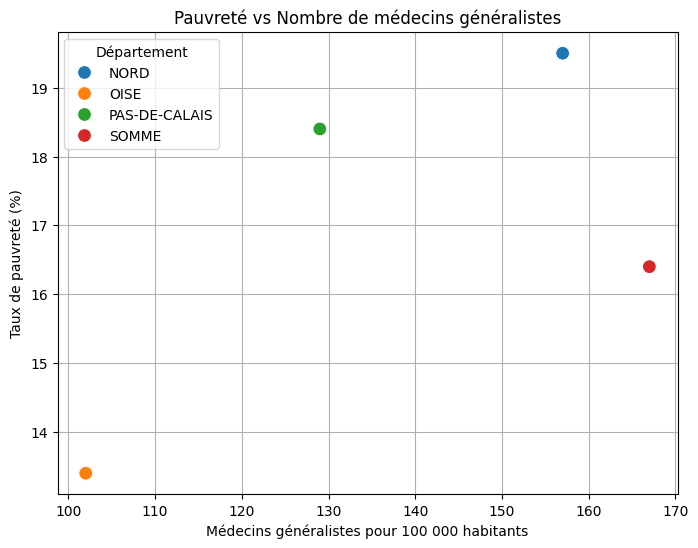

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x="Densité de médecins généralistes 100 000 habitants",
                y="Taux de pauvreté(2023)",
                hue="Département",
                s=100)
plt.title("Pauvreté vs Nombre de médecins généralistes")
plt.xlabel("Médecins généralistes pour 100 000 habitants")
plt.ylabel("Taux de pauvreté (%)")
plt.grid(True)
plt.show()

C:\Users\EL-FANNASSI\AppData\Local\Temp\ipykernel_24508\1548763497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


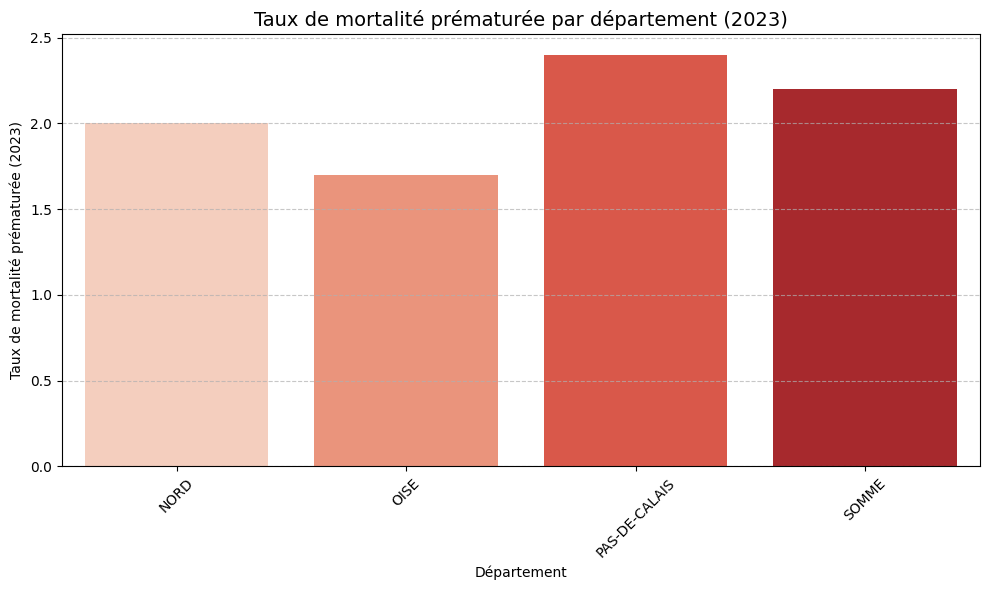

In [53]:
# 📊 Barplot – Taux de mortalité prématurée (2023) par département
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Département",
    y="Taux de mortalité prématurée (2023)",
    palette="Reds"
)

plt.title("Taux de mortalité prématurée par département (2023)", fontsize=14)
plt.ylabel("Taux de mortalité prématurée (2023)")
plt.xlabel("Département")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\EL-FANNASSI\AppData\Local\Temp\ipykernel_24508\3253831260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Sexe", y="Espérance de vie", palette="Set2")


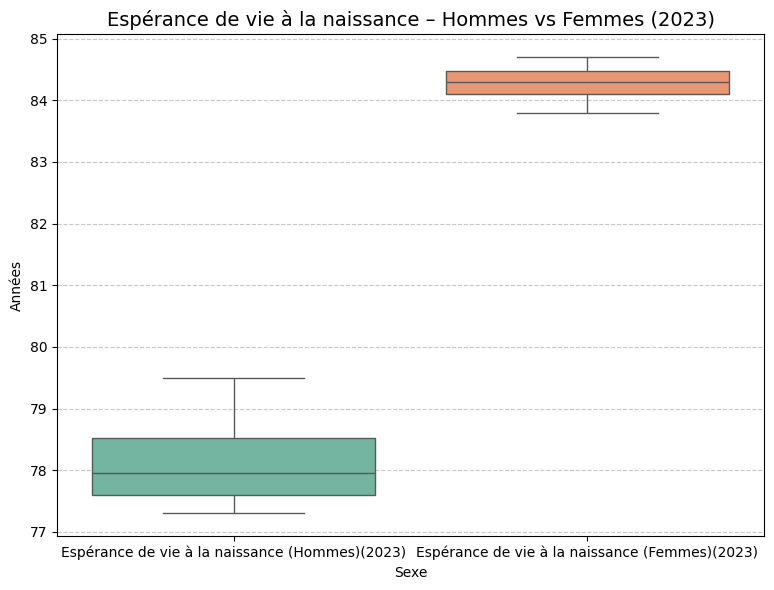

In [54]:
# 🧊 Restructuration des données pour comparer H/F en boxplot
df_box = df[[
    "Département",
    "Espérance de vie à la naissance (Hommes)(2023)",
    "Espérance de vie à la naissance (Femmes)(2023)"
]]

# On passe au format long
df_long = df_box.melt(id_vars="Département",
                      var_name="Sexe",
                      value_name="Espérance de vie")

# 🎨 Boxplot comparatif
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_long, x="Sexe", y="Espérance de vie", palette="Set2")

plt.title("Espérance de vie à la naissance – Hommes vs Femmes (2023)", fontsize=14)
plt.xlabel("Sexe")
plt.ylabel("Années")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


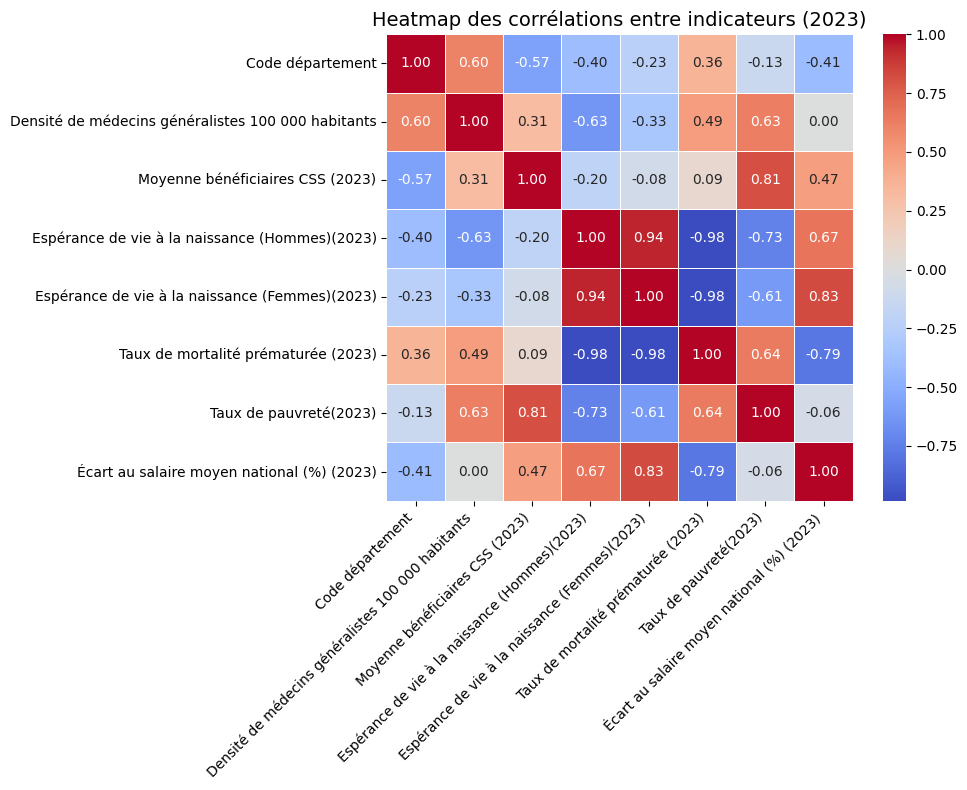

In [55]:
# 🔍 On sélectionne uniquement les colonnes numériques pour la corrélation
df_num = df.select_dtypes(include=["float64", "int64"])

# 🔥 Calcul de la matrice de corrélation
corr_matrix = df_num.corr()

# 🎨 Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Heatmap des corrélations entre indicateurs (2023)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


 
 **les liens statistiques entre santé, précarité et accès aux soins** dans la region Hauts-de-France 👇

---

## 🔎 Lecture des corrélations fortes :

### 💀 **Taux de mortalité prématurée (2023)**
- **corrélé négativement avec :**
  - Espérance de vie H : **-0.98**
  - Espérance de vie F : **-0.98**
- **corrélé positivement avec :**
  - Taux de pauvreté : **+0.64**
  - CSS : **+0.09**
  - Faible densité de médecins : **+0.49**

➡️ **Conclusion** : Les départements où on vit moins longtemps sont aussi ceux :
- avec plus de pauvreté
- moins de médecins généralistes
- plus de bénéficiaires CSS

---

### 🩺 **Densité de médecins généralistes**
- **positivement corrélée à :**
  - Espérance de vie H : **+0.63**
  - Espérance de vie F : **+0.33**
- **négativement à mortalité prématurée** : **-0.49**

➡️ Plus il y a de médecins généralistes, plus l’espérance de vie est longue et la mortalité prématurée faible.

---

### 💶 **Écart au salaire moyen national**
- **positivement corrélé à espérance de vie femmes :** **+0.83**
- **négativement à mortalité prématurée :** **-0.79**

➡️ Les départements **pauvres** ont une **espérance de vie plus faible** et **une mortalité prématurée plus élevée**.

---


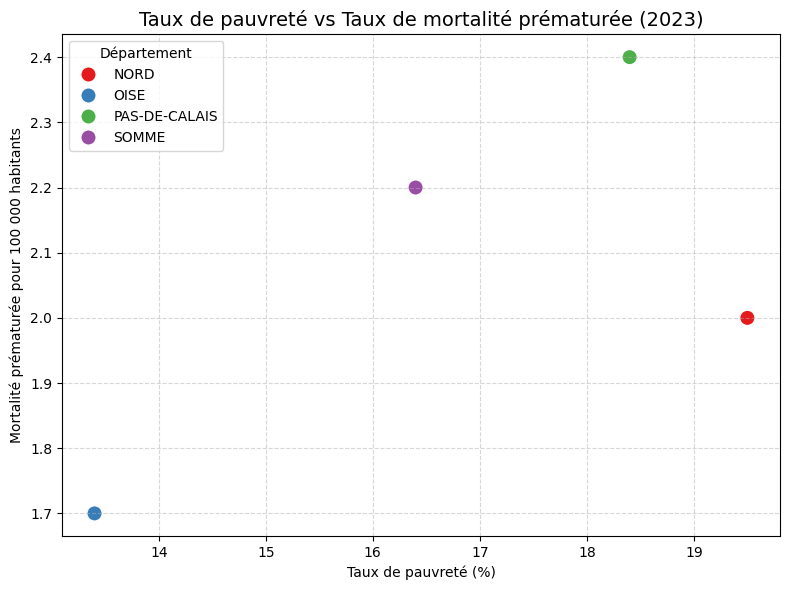

In [56]:
# 📈 Scatterplot : Pauvreté vs Mortalité prématurée
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Taux de pauvreté(2023)",
    y="Taux de mortalité prématurée (2023)",
    hue="Département",
    s=120,
    palette="Set1"
)

plt.title("Taux de pauvreté vs Taux de mortalité prématurée (2023)", fontsize=14)
plt.xlabel("Taux de pauvreté (%)")
plt.ylabel("Mortalité prématurée pour 100 000 habitants")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


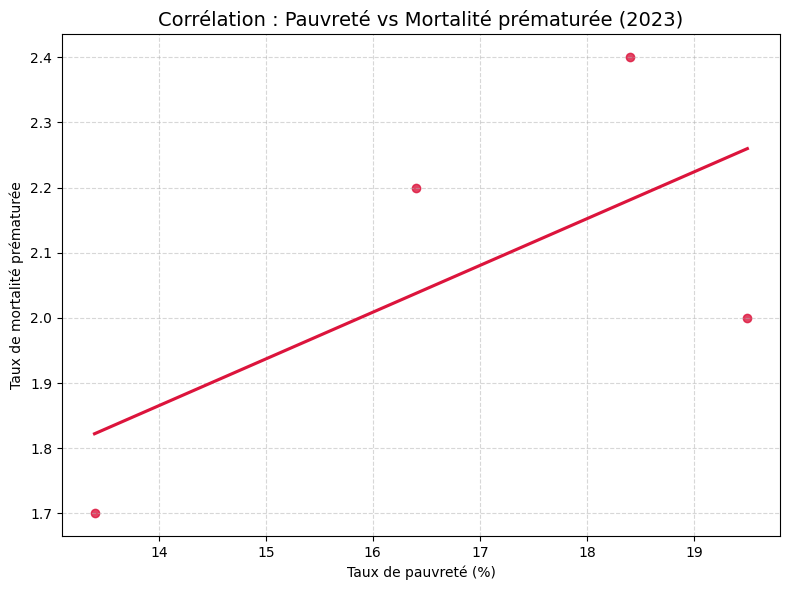

In [57]:
# 📉 Scatterplot + régression linéaire
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x="Taux de pauvreté(2023)",
    y="Taux de mortalité prématurée (2023)",
    scatter=True,
    ci=None,
    color="crimson",
    marker="o"
)

plt.title("Corrélation : Pauvreté vs Mortalité prématurée (2023)", fontsize=14)
plt.xlabel("Taux de pauvreté (%)")
plt.ylabel("Taux de mortalité prématurée")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
